<a href="https://colab.research.google.com/github/Ochi-Shoichi5539/graduation_research/blob/main/vgg16_test_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VGG16を用いて猫と犬の画像を識別する
- 参考にした文献
  - https://newtechnologylifestyle.net/vgg16originalpicture/

## 手順1 検証用画像をアップロードし、解凍する

In [1]:
# 猫の画像のzipファイルをアップロード
from google.colab import files
uploaded = files.upload()

Saving cat.zip to cat.zip


In [2]:
# 犬の画像のzipファイルをアップロード
from google.colab import files
uploaded = files.upload()

Saving dog.zip to dog.zip


In [49]:
# 猫の画像のzipファイルを解凍
!unzip "/content/cat.zip"

Archive:  /content/cat.zip
  inflating: cats/cat10.jpg          
replace cats/cat2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
# 犬の画像のzipファイルを解凍
!unzip "/content/dog.zip"

Archive:  /content/dog.zip
  inflating: dogs/37b36dbaaf4fed1c440cceaefc8aa7bc.jpg  
  inflating: dogs/agsah].jpg         
  inflating: dogs/dog.jpg            
  inflating: dogs/doga.jpg           
  inflating: dogs/dogg.jpg           
  inflating: dogs/dogga.jpg          
  inflating: dogs/doggg.jpg          
  inflating: dogs/dogggg.jpg         
  inflating: dogs/dogh.jpg           
  inflating: dogs/dogs.jpg           


## 手順2 VGG16を使うために必要なライブラリをインポート

In [48]:
#必要なライブラリをインポート
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

In [14]:
# VGG16の読み出し
model = VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [15]:
# 読み出したVGG16のモデルの確認
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
# INPUT画像を224 x 224にリサイズして画像の読み込み
for number in range(10):
  cat_file_name = 'cat' + f'{number}' 
  dog_file_name = 'dog' + f'{number}'
  images_cat = image.load_img(f'/content/cats/{cat_file_name}.jpg', target_size=(224, 224))
  images_dog  = image.load_img(f'/content/dogs/{dog_file_name}.jpg' , target_size=(224, 224))

In [35]:
# 読み込んだ画像をarrayに変換
array_cat  = image.img_to_array(images_cat)
array_dog = image.img_to_array(images_dog)

In [36]:
# 画像をVGG16モデルの事前学習時と同じ状態に合わせて変換
array_cat = preprocess_input(array_cat)
array_dog = preprocess_input(array_dog)

In [37]:
# 3次元テンソル（rows, cols, channels) を 4次元テンソル (samples, rows, cols, channels) に変換
input = np.stack([array_cat, array_dog])
input.shape

(2, 224, 224, 3)

In [45]:
# 予測値を算出
# 予想値は確率が高いTOP10を表示
preds = model.predict(input)
results = decode_predictions(preds, top=10)

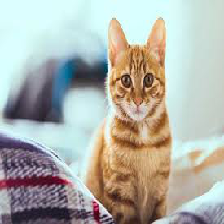

In [40]:
images_cat

In [46]:
results[0]

[('n02124075', 'Egyptian_cat', 0.47539625),
 ('n02123045', 'tabby', 0.17426684),
 ('n02123159', 'tiger_cat', 0.080975935),
 ('n02123597', 'Siamese_cat', 0.041274745),
 ('n02127052', 'lynx', 0.01884943),
 ('n04033995', 'quilt', 0.015471317),
 ('n04074963', 'remote_control', 0.011103901),
 ('n02883205', 'bow_tie', 0.010151869),
 ('n04265275', 'space_heater', 0.009880521),
 ('n02091244', 'Ibizan_hound', 0.007904428)]

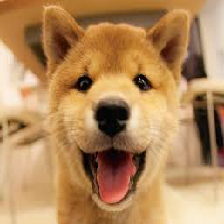

In [53]:
images_dog

In [47]:
results[1]

[('n02115641', 'dingo', 0.3801225),
 ('n02113023', 'Pembroke', 0.25408605),
 ('n02109961', 'Eskimo_dog', 0.15797956),
 ('n02113186', 'Cardigan', 0.064850084),
 ('n02110185', 'Siberian_husky', 0.029522868),
 ('n02110063', 'malamute', 0.022776311),
 ('n02105412', 'kelpie', 0.010745027),
 ('n02099601', 'golden_retriever', 0.009917105),
 ('n02094258', 'Norwich_terrier', 0.008165488),
 ('n03218198', 'dogsled', 0.007781879)]